# Assignment 4: Simulating your income 
Shuting Chen  
11/05/2017

### Question 1: Simulate 10,000 different realizations of lifetime income 

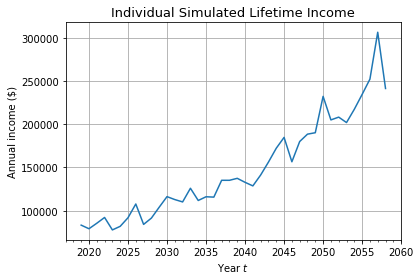

In [1]:
# Import some packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Set the parameters that will be used in a dictionary  
p = {'inc_0'     : 80000, # average initial income 
     'mean'      : 0,     # mean of log-normal errors
     'sigma'     : 0.1,   # standard deviation of log-normal errors 
     'rho'       : 0.2,   # positive effect rate 
     'g'         : 0.03,  # growth rate of annual salary 
     'st_year'   : 2019,  # start year 
     'work_years': 40,    # years of working 
     'num_draws' : 10000, # number of simulations 
}

# Simulate 10000 different realizations of lifetime income
def sim_lf_income(pa):
    # Set random seed 
    np.random.seed(60)
    # Draw 10000 sets of 40 normally distributed errors with mean 0 and s.d. of 0.1
    normal_errors = np.random.normal(pa['mean'], pa['sigma'], (pa['work_years'], pa['num_draws']))
    # Create a matrix to store simulation results 
    ln_income_mat = np.zeros((pa['work_years'], pa['num_draws']))
    # Fill the income for the initial year, 2019
    ln_income_mat[0, :] = np.log(pa['inc_0']) + normal_errors[0, :]
    # Loop and apply the model 
    for t in range(1, pa['work_years']):
        ln_income_mat[t, :] = ((1 - pa['rho']) * (np.log(pa['inc_0']) + pa['g'] * t) +
                              pa['rho'] * ln_income_mat[t - 1, :] + normal_errors[t, :])
        
    income_mat = np.exp(ln_income_mat)
    return income_mat

lf_income_mat = sim_lf_income(p)

# Plot one of the lifetime income paths: 
%matplotlib inline 
year_vec = np.arange(p['st_year'], p['st_year'] + p['work_years'])
individual = 600 
fig, ax = plt.subplots()
plt.plot(year_vec, lf_income_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b = True, which = 'major', color = '0.65', linestyle = '-')
plt.title('Individual Simulated Lifetime Income', fontsize = 13)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual income (\$)')
plt.show()

### Question 2: Plot a histogram of initial incomes in 2019 for 10000 simulations 

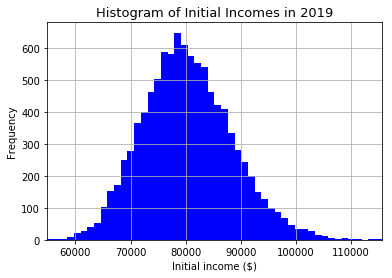

In [2]:
# Obtain initial incomes for 10000 simulations in 2019
initial_income = lf_income_mat[0, :]

# Plot a histogram of inital incomes in 2019 for 10000 simulations 
%matplotlib inline 
fig, ax = plt.subplots()
plt.grid(True)
plt.hist(initial_income, 50, facecolor = 'b')
plt.xlim(min(initial_income), max(initial_income))
plt.xlabel(r'Initial income (\$)')
plt.ylabel(r'Frequency')
plt.title('Histogram of Initial Incomes in 2019', fontsize = 13)
plt.show()

In [3]:
# Compute the percentage of MACSS graduates earning more than $100,000 in the first year out of the program 
count = 0
for i in initial_income:
    if i > 100000:
        count += 1  
percentage = (count / p['num_draws']) * 100
print('{:.2f}% of MACSS graduates earn more than $100,000 in the first year out of the program.'.format(percentage))

1.37% of MACSS graduates earn more than $100,000 in the first year out of the program.


In [4]:
# Compute the percentage of MACSS graduates earning less than $70,000 in the first year out of the program 
count = 0
for i in initial_income:
    if i < 70000:
        count += 1  
percentage = (count / p['num_draws']) * 100
print('{:.2f}% of MACSS graduates earn less than $70,000 in the first year out of the program.'.format(percentage))

9.43% of MACSS graduates earn less than $70,000 in the first year out of the program.


According to the histogram displayed above, the distribution is approximately symmetric and bell-shaped. Therefore, it is reasonable to conclude that the distribution is normally distributed. 

### Question 3: Plot a histogram of how many years it takes to pay off the loan in each of 10,000 simulations 

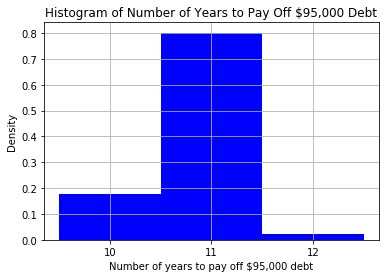

In [5]:
# Obtain a vector of how many years it takes to pay off the loan in each of 10,000 simulations 
initial_debt = 95000
pay_off_rate = 0.1 
debt_mat = np.full(p['num_draws'], initial_debt)
all_years_with_loan = np.zeros(p['num_draws'])
for i in range(0, p['num_draws']):
    years_with_loan = 0
    for t in range (0, p['work_years']):
        years_with_loan += 1
        debt_mat[i] -= pay_off_rate * lf_income_mat[t, i]
        if debt_mat[i] <= 0:
            break 
    all_years_with_loan[i] = years_with_loan

# Plot the hitogram 
%matplotlib inline 
fig, ax = plt.subplots()
plt.grid(True)
plt.hist(all_years_with_loan, bins = np.arange(min(all_years_with_loan) - 0.5, max(all_years_with_loan) + 1, 1), 
         facecolor = 'b', density = True) 
plt.xlabel(r'Number of years to pay off $95,000 debt')
plt.ylabel(r'Density')
plt.xticks(np.arange(np.min(all_years_with_loan), np.max(all_years_with_loan) + 1 ))
plt.title('Histogram of Number of Years to Pay Off $95,000 Debt', fontsize = 12)
plt.show()

In [6]:
# Compute the percentage of MACSS graduates paying off the loan in 10 years  
count = 0
for i in all_years_with_loan:
    if i <= 10:
        count += 1  
percentage = (count / p['num_draws']) * 100
print('{:.2f}% of MACSS graduates can pay off the loan in 10 years.'.format(percentage))

17.82% of MACSS graduates can pay off the loan in 10 years.


### Question 4: Plot a new histogram of how many years it takes to pay off the loan with new 10,000 simulations

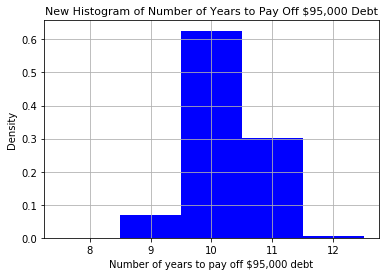

In [7]:
# Specify a new dictionary for parameters 
p1 = {'inc_0'     : 85000, # new average initial income 
      'mean'      : 0,     # mean of log-normal errors
      'sigma'     : 0.15,  # new standard deviation of log-normal errors 
      'rho'       : 0.2,   # positive effect rate 
      'g'         : 0.03,  # growth rate of annual salary 
      'st_year'   : 2019,  # start year 
      'work_years': 40,    # years of working 
      'num_draws' : 10000, # number of simulations 
}

# Simulate new 10000 different realizations of lifetime income
def sim_lf_income(pa1):
    # Set random seed 
    np.random.seed(60)
    # Draw 10000 sets of 40 normally distributed errors with mean 0 and s.d. of 0.1
    normal_errors = np.random.normal(pa1['mean'], pa1['sigma'], (pa1['work_years'], pa1['num_draws']))
    # Create a matrix to store simulation results 
    ln_income_mat = np.zeros((pa1['work_years'], pa1['num_draws']))
    # Fill the income for the initial year, 2019
    ln_income_mat[0, :] = np.log(pa1['inc_0']) + normal_errors[0, :]
    # Loop and apply the model 
    for t in range(1, pa1['work_years']):
        ln_income_mat[t, :] = ((1 - pa1['rho']) * (np.log(pa1['inc_0']) + pa1['g'] * t) +
                              pa1['rho'] * ln_income_mat[t - 1, :] + normal_errors[t, :])
        
    income_mat = np.exp(ln_income_mat)
    return income_mat

# Compute new 10,000 lifetime income paths: 
new_lf_income_mat = sim_lf_income(p1)

# Obtain a new vector of how many years it takes to pay off the loan in each of 10,000 simulations 
new_debt_mat = np.full(p1['num_draws'], initial_debt)
new_all_years_with_loan = np.zeros(p1['num_draws'])
for i in range(0, p['num_draws']):
    years_with_loan = 0
    for t in range (0, p1['work_years']):
        years_with_loan += 1
        new_debt_mat[i] -= pay_off_rate * new_lf_income_mat[t, i]
        if new_debt_mat[i] <= 0:
            break 
    new_all_years_with_loan[i] = years_with_loan

# Plot the new hitogram 
%matplotlib inline 
fig, ax = plt.subplots()
plt.grid(True)
plt.hist(new_all_years_with_loan, bins = np.arange(min(new_all_years_with_loan) - 0.5, 
                                                   max(new_all_years_with_loan) + 1, 1), 
         facecolor = 'b', density = True) 
plt.xlabel(r'Number of years to pay off $95,000 debt')
plt.ylabel(r'Density')
plt.xticks(np.arange(np.min(new_all_years_with_loan), np.max(new_all_years_with_loan) + 1 ))
plt.title('New Histogram of Number of Years to Pay Off $95,000 Debt', fontsize = 11)
plt.show()

In [8]:
# Compute the new percentage of MACSS graduates paying off the loan in 10 years  
count = 0
for i in new_all_years_with_loan:
    if i <= 10:
        count += 1  
percentage = (count / p1['num_draws']) * 100
print('{:.2f}% of MACSS graduates can pay off the loan in 10 years.'.format(percentage))

69.48% of MACSS graduates can pay off the loan in 10 years.
